<h1 align="center">Text Clustering</h1>

## Introduction

This chapter is about the technique of *clustering* to solve the problem of finding related text documents.

*Clustering* is an *unsupervised* learning method, called so because there are no labels for the training set. There may be many reasons for not having labels - giving definitive labels may not be possible, or the cost and time required for labelling the set may be too high, or the volume of data may be too high.

In such scenarios, clustering is used to let the data describe itself, and use some suitable similarity metric to calculate which cluster a sample belongs to.

## Clustering Example

In this workbook, we run clustering algorithms on the posts contained in sklearn's [20 newsgroups](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html) inbuilt dataset. Since we already know the newsgroups to which each post belongs, it's possible to evaluate the effectiveness of these unsupervised clustering algorithms in matching reality.

In [83]:
%matplotlib inline

import numpy as np
import scipy as sp
import sklearn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

import nltk
from nltk.stem import PorterStemmer

from sklearn.datasets import fetch_20newsgroups

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from pprint import pprint

In [60]:
training_data = fetch_20newsgroups(subset='train')
testing_data = fetch_20newsgroups(subset='test')

train_posts = training_data['data']
test_posts = testing_data['data']

print("Number of training posts:", len(train_posts))
print("Number of testing posts:", len(test_posts))

Number of training posts: 11314
Number of testing posts: 7532


<br>
## Exploring the dataset

The dataset consists of posts of 20 newsgroups.

First, we explore the number of posts in each newsgroup by creating a pandas DataFrame for easy visualization and manipulation.

In [61]:
df = pd.DataFrame(data={'newsgroup':training_data['target_names'], 'posts' : np.bincount(training_data['target'])})
df

,newsgroup,posts
0,alt.atheism,480
1,comp.graphics,584
2,comp.os.ms-windows.misc,591
3,comp.sys.ibm.pc.hardware,590
4,comp.sys.mac.hardware,578
5,comp.windows.x,593
6,misc.forsale,585
7,rec.autos,594
8,rec.motorcycles,598
9,rec.sport.baseball,597


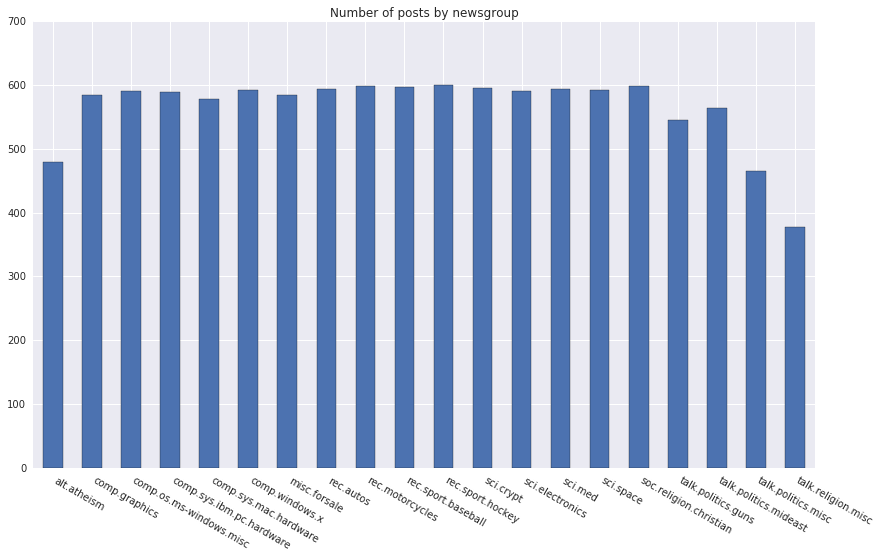

In [81]:
ax = df.plot(title='Number of posts by newsgroup', kind='bar',  figsize=(14,8), use_index=False, legend=False, 
             ylim=(0,700))

ax.set_xticklabels(df.newsgroup, rotation=330, ha='left')

plt.show()

Here's what a couple of posts look like. Observe that a lot of the metadata fields at top contain noise words that can be completely stripped out.

In [94]:
print('==============\n\n\n'.join(train_posts[:2]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----






From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.w

<br/>
## Extracting features from text documents ##

A couple of ways to extract features from text documents for the purpose of clustering:

+ treat a document as unordered **bag of words**

+ use presence or absence of each word as a (boolean/binary) feature 

+ use frequencies (ie, counts) of words as features

+ use frequencies of words in each document, but scaled inversely by their occurrence across all documents in the corpus. This is called **TF-IDF** ( *T*erm *F*requency - *I*nverse *D*ocument *F*requency)

+ use combinations of words, instead of single words - termed as bigrams, trigrams and n-grams.

### <span style="color:green">Count vectors as features</span>

In [48]:
count_vec = CountVectorizer()

train_counts = count_vec.fit_transform(train_posts)

words = count_vec.get_feature_names()

print(train_counts.shape)

(11314, 130107)


Most of the tokenized words are in fact meaningless, and can probably be thrown away. 

For example, the first twenty to thirty thousand words are all meaningless ones like these:

In [47]:
np.random.choice(words[0:25000], 50)

array(['111919', '8yx_g6', '153959', '1481', '151834', '323', '710e',
       '_charts', '1q2', '1sq20h', '4045', '1qcq4ginn2q7', '7w6', '060043',
       '_bxph6q', '65952', '324', '1achzd88zd88o', '9yxp', '1204', '5pc',
       '25hd', '3eu', '0p0e', '600cc', '3dh4', '0p9c', '214902', '8qds6',
       'a3mk', '8rlk', '6ecqm', '171354', '0936', '34tuiw', '9028', '80d',
       '06ku', '2sk', '24e2r4e', '130mph', '6f_q', '1qjipo', '7330',
       '1152x900', '734810202', '2rz', '_active_', '5099en24', '6805'], 
      dtype='<U81')

In [96]:
test_counts = count_vec.transform(test_posts)

print(test_counts.shape)

(7532, 130107)


In [97]:
km = KMeans()
km.fit(train_counts)

km.predict(test_counts[:2])

/home/karthik/work/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


array([0, 0], dtype=int32)

# TODO

  + Levenshtein vs Bag of words
  + Word count vectors
  + CountVectorizer, ngram_range, max_df, max_features
  + coo_matrix sparse matrix
  + Euclidean and other distance metrics - cosine, pearson, jaccard
  + normalized counts
  + stop words inbuilt in CountVectorizer
  + stemming of words using nltk
  + How to avoid the problem of higher count implying more importance, by calculating TF-IDF score
  + Drawbacks of bag of words approach
  + Flat clustering vs hierarchical clustering
  + algorithms in sklearn.cluster module
  + KMeans, number of clusters